In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy.stats.contingency import odds_ratio


from numpy.random import uniform
from numpy.random import normal
from numpy.random import exponential
from numpy.random import lognormal

from numpy.random import choice
from numpy.random import permutation


from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import fisher_exact

from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.cluster import KMeans


%matplotlib inline

# Dimentia among long-livers

**Mini-mental State Examination (MMSE)** -  is a set of 11 questions.


*   It's used by to check for cognitive impairment.
*   The test takes about 5 to 10 minutes.
*   The top score for the MMSE is 30 — a score of 25 or higher is said to be normal.

In [ ]:
# path='' # path to file dementia.csv
data = pd.read_csv(path,index_col=0)

In [ ]:
data.head()

,sex,do you consume alcohol?,MMSE,dementia
0,male,not currently,29.0,0.0
1,male,not currently,14.0,1.0
2,male,not currently,28.0,0.0
3,female,not currently,27.0,0.0
4,female,not currently,18.0,1.0


In [ ]:
data['do you consume alcohol?'].unique()

array(['not currently', 'yes'], dtype=object)

## How does often Dementia occur among long-livers?   

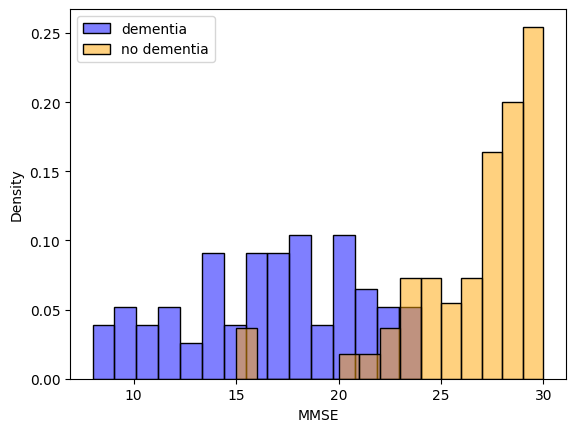

In [ ]:
sns.histplot(data=data[data['dementia']==1]['MMSE'], color='blue', alpha=0.5, label='dementia',bins=15,stat='density')
sns.histplot(data=data[data['dementia']==0]['MMSE'], color='orange', alpha=0.5, label='no dementia',bins=15,stat='density')
plt.xlabel('MMSE')
plt.ylabel('Density')
plt.legend()

plt.show()

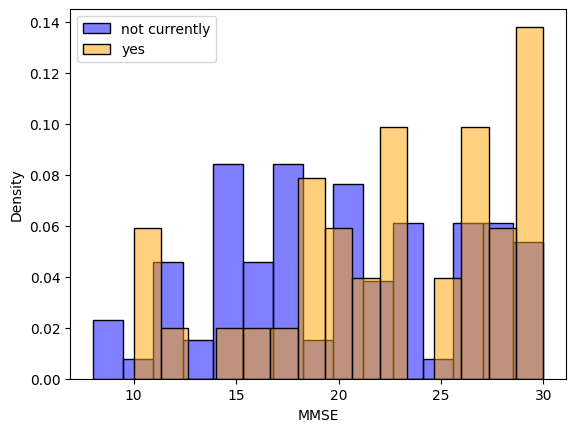

In [ ]:
sns.histplot(data=data[data['do you consume alcohol?']=='not currently']['MMSE'], color='blue', alpha=0.5, label='not currently', bins=15,stat='density')
sns.histplot(data=data[data['do you consume alcohol?']=='yes']['MMSE'], color='orange', alpha=0.5, label='yes', bins=15,stat='density')
plt.xlabel('MMSE')
plt.ylabel('Density')
plt.legend()

plt.show()

Let's calculate MW test between 2 groups :
1. who drinks alcohol,
2. Who does not currently drink

In [ ]:
# mannwhitneyu() - let's calculate

## Let's to calculate the OR to prevent dementia with alcohol consumption :)

In [ ]:
df = data[['do you consume alcohol?','dementia']]

In [ ]:
df[df['do you consume alcohol?']=="yes"]['dementia'].value_counts()

0.0    20
1.0    18
Name: dementia, dtype: int64

In [ ]:
df[df['do you consume alcohol?']=="not currently"]['dementia'].value_counts()

1.0    54
0.0    35
Name: dementia, dtype: int64

In [ ]:
table=pd.DataFrame([[35, 54], [20, 18]])

In [ ]:
oddsratio, pvalue = fisher_exact(table)
print("OddsR: ", oddsratio, "p-Value:", pvalue)
